In [81]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [82]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [83]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [84]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [85]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine) 

In [86]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [87]:
# Save references to each table
Stations = Base.classes.station 
Measurements = Base.classes.measurement

In [88]:
# Create our session (link) from Python to the DB
session = Session(engine) 

# Exploratory Precipitation Analysis

In [89]:
# Find the most recent date in the data set.
first_date = session.query(Measurements.date).filter(func.and_(func.date(Measurements.date) > '8/22/2017'),\
                                              func.date(Measurements.date) < '8/24/2017')
print(first_date)

SELECT measurement.date AS measurement_date 
FROM measurement 
WHERE and(date(measurement.date) > ?) AND date(measurement.date) < ?


('2017-08-23',)
2016-08-23


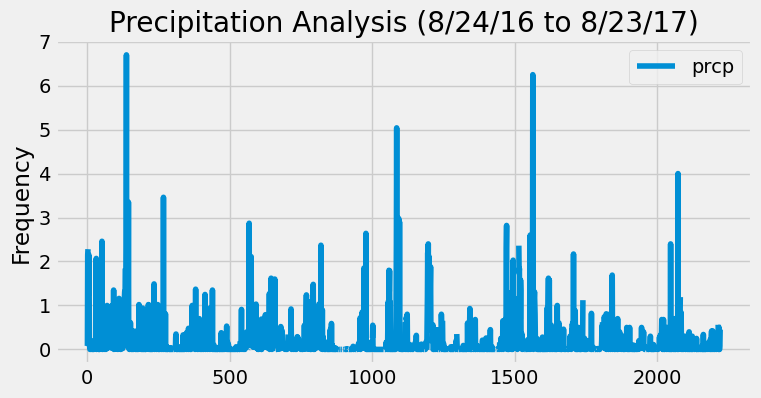

In [90]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
print(recent_date)
# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_ago)

# Perform a query to retrieve the data and precipitation scores
prec_data = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date > one_year_ago).\
    order_by(Measurements.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

prec_data_df = pd.DataFrame(prec_data)
prec_data_df.head() 
# Sort the dataframe by date
prec_data_df.set_index('date').head()

# Use Pandas Plotting with Matplotlib to plot the data
ax = prec_data_df.plot(figsize=(8,4))
ax.set_title("Precipitation Analysis (8/24/16 to 8/23/17)") 
ax.set_ylabel("Frequency") 
plt.show()

In [91]:
# Use Pandas to calculate the summary statistics for the precipitation data
prec_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [96]:
# Design a query to calculate the total number of stations in the dataset
locations = session.query(Measurements).group_by(Measurements.station).count()
print("There are {} stations available.".format(locations))

There are 9 stations available.


In [99]:
# Design a query to find the most active stations (i.e. which st
session.query(Measurements.station, func.count(Measurements.station)).\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [102]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp = [func.min(Measurements.tobs),
       func.max(Measurements.tobs),
       func.avg(Measurements.tobs)]
session.query(*temp).filter(Measurements.station=='USC00519281').all()   

[(54.0, 85.0, 71.66378066378067)]

In [105]:
# Using the most active station id
temp_obs = session.query(Measurements.tobs).\
                                filter(Measurements.station=='USC00519281').\
                                filter(Measurements.date >= one_year_ago).\
                                order_by(Measurements.date.desc()).all()
temp_obs_df = pd.DataFrame(temp_obs)
temp_obs_df.head()



,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0


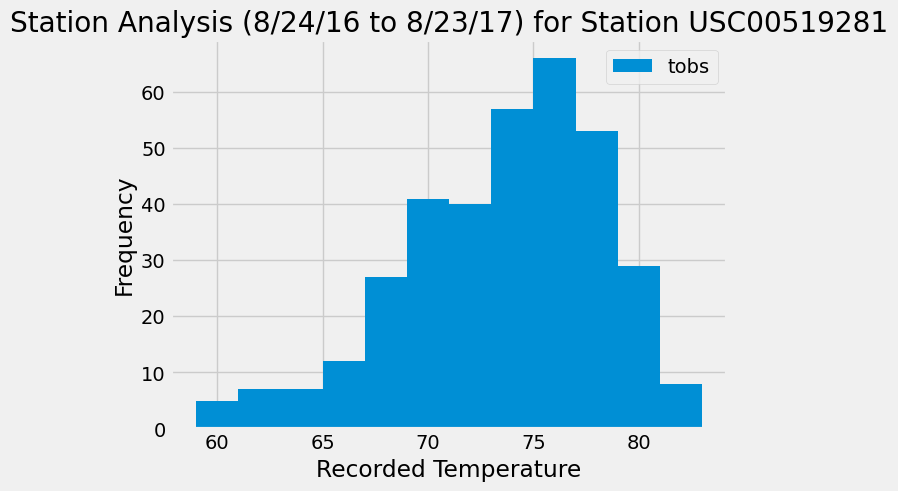

In [107]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(temp_obs_df['tobs'], bins=12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency")
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station " + 'USC00519281')
plt.legend(["tobs"])
plt.show()


# Close Session

In [108]:
# Close Session
session.close()